<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%206/Assignment%206B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


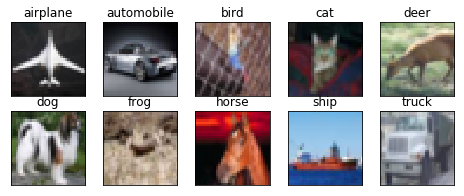

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Base Model

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 15s 39ms/step - loss: 1.8468 - acc: 0.2948 - val_loss: 1.4807 - val_acc: 0.4482
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.3568 - acc: 0.5084 - val_loss: 1.1420 - val_acc: 0.5876
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 1.1362 - acc: 0.6007 - val_loss: 1.0234 - val_acc: 0.6323
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9949 - acc: 0.6516 - val_loss: 0.9279 - val_acc: 0.6739
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8929 - acc: 0.6902 - val_loss: 0.7903 - val_acc: 0.7284
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8121 - acc: 0.7189 - val_loss: 0.7381 - val_acc: 0.7458
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7585 - acc: 0.7386 - val_loss: 0.7109 - val_acc: 0.7593
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

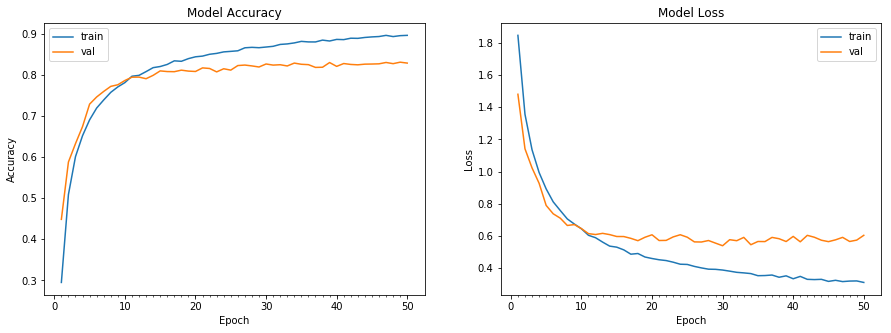

Accuracy on test data is: 82.82


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Modified Network

1.   Normal Convolution
2.   Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(1,3))
3.   Depthwise Separable Convolution
4.   Grouped Convolution (use 3x3, 5x5 only)
5.   Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2)
6.   All of the 5 above at least once
7.   Train the model for 50 epochs

In [0]:
## MAIN BLOCK

from keras.layers import Activation
from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, SeparableConv2D

input = Input(shape=(32,32,3),name="input")

# Block 1 : Jump 1  [Spatially Separable Convolution]
x1  = Conv2D(32, (3,3), activation='relu',padding='same', name='x1')(input)           # RF - (3,3) 
x2a = Conv2D(32, (3,1), activation='relu',padding='same', name='x2a')(x1)             # RF - (5,3)
x2b = Conv2D(32, (1,3), activation='relu',padding='same', name='x2b')(x2a)            # RF - (5,5)
x3  = Conv2D(32, (3,3), activation='relu',padding='same', name='x3')(x2b)             # RF - (7,7)
x4  = MaxPooling2D(pool_size=(2, 2),name='x4')(x3)                                    # RF - (8,8)


# Block 2 : Jump 2 [Depthwise Separable Convolution]
x9 =  Conv2D(64, (3,3), activation='relu',padding='same', name='x9')(x4)              # RF - (12,26)
x10 = SeparableConv2D(64, (3,3), activation='relu',padding='same', name='x10')(x9)    # RF - (16,34)
x11 = SeparableConv2D(64, (3,3), activation='relu',padding='same', name='x11')(x10)   # RF - (20,42)
x12 = MaxPooling2D(pool_size=(2, 2),name='x12')(x10)                                  # RF - (22,42)

# Block 3 : Jump 4 [Grouped Convolution with different kernels]
x13  = Conv2D(128, (3,3), activation='relu',padding='same', name='x13')(x4)                                        # RF - (30,30)
x14a = Conv2D(128, (3,3), activation='relu',padding='same', name='x14a')(x13)                                      # RF - (38,38)
x14b = Conv2D(128, (5,5), activation='relu',padding='same', name='x14b')(x13)                                      # RF - (46,46)
x15  = Conv2D(128, (1,1), activation='relu',padding='same', name='x15')(concatenate([x14a, x14b],name='concat_2')) # RF - (46,46)
x16 = MaxPooling2D(pool_size=(2, 2),name='x16')(x15)                                                               # RF - (50,50)

# Block 4 : Jump 8 [Grouped Convolution with atrous convolution]
x17  = Conv2D(128, (3,3), activation='relu',padding='same', name='x17')(x16)                                       # RF - (66,66)
x18a = Conv2D(128, (3,3), activation='relu',padding='same', dilation_rate=1, name='x18a')(x17)                     # RF - (82,82)
x18b = Conv2D(128, (3,3), activation='relu',padding='same', dilation_rate=2, name='x18b')(x17)                     # RF - (82,82)
x19  = Conv2D(64 , (1,1), activation='relu',padding='same', name='x19')(concatenate([x18a, x18b],name='concat_3')) # RF - (82,82)

# Block 5 : Jump 8 [Normal Convolution]
x20  = Conv2D(64, (3,3), activation='relu',padding='valid', name='x20')(x19)          # RF - (98,98)
x21  = Conv2D(64, (3,3), activation='relu',padding='valid', name='x21')(x20)          # RF - (114,114)
x22  = Conv2D(10, (4,4), activation=None  ,padding='valid', name='x22')(x21)          # RF - (138,138)
x22_f = Flatten(name='flatten')(x22)

x23 = Activation('softmax',name='final')(x22_f)
output = x23

model = Model(inputs=[input], outputs=[output])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
x1 (Conv2D)                     (None, 32, 32, 32)   896         input[0][0]                      
__________________________________________________________________________________________________
x2a (Conv2D)                    (None, 32, 32, 32)   3104        x1[0][0]                         
__________________________________________________________________________________________________
x2b (Conv2D)                    (None, 32, 32, 32)   3104        x2a[0][0]                        
__________________________________________________________________________________________________
x3 (Conv2D

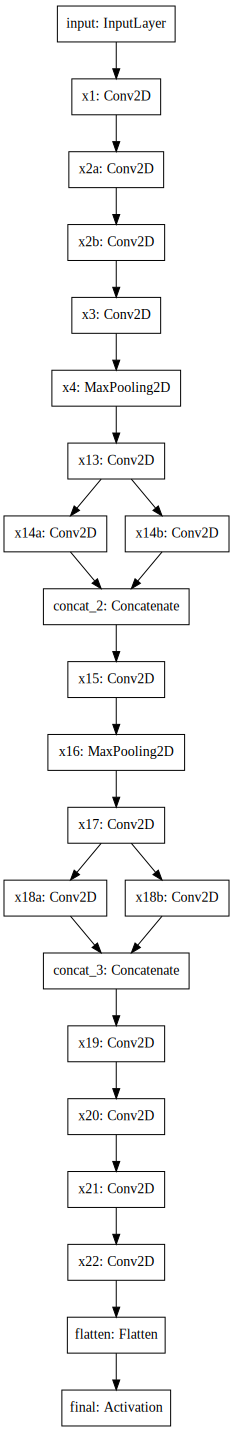

In [0]:
## Network Architecture

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Epoch 1/50
390/390 [==============================] - 21s 54ms/step - loss: 1.7331 - acc: 0.3487 - val_loss: 1.5044 - val_acc: 0.4448
Epoch 2/50
390/390 [==============================] - 16s 41ms/step - loss: 1.3103 - acc: 0.5232 - val_loss: 1.2182 - val_acc: 0.5568
Epoch 3/50
390/390 [==============================] - 16s 41ms/step - loss: 1.0491 - acc: 0.6241 - val_loss: 0.9980 - val_acc: 0.6400
Epoch 4/50
390/390 [==============================] - 16s 41ms/step - loss: 0.8704 - acc: 0.6923 - val_loss: 0.8276 - val_acc: 0.7104
Epoch 5/50
390/390 [==============================] - 16s 42ms/step - loss: 0.7365 - acc: 0.7407 - val_loss: 0.7673 - val_acc: 0.7416
Epoch 6/50
390/390 [==============================] - 17s 42ms/step - loss: 0.6301 - acc: 0.7793 - val_loss: 0.7118 - val_acc: 0.7542
Epoch 7/50
390/390 [==============================] - 17s 42ms/step - loss: 0.5360 - acc: 0.8142 - val_loss: 0.6811 - val_acc: 0.7695
Epoch 8/50
390/390 [==============================] - 17s 42ms

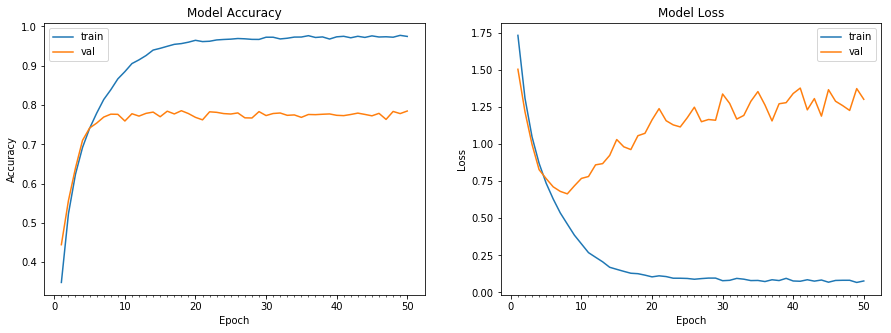

Accuracy on test data is: 78.49


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = train_features.shape[0]//128, epochs = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))